In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline

# Video Game Sales Research Proposal
What sells a new game?  Obviously there are myriad factors that go into creating a hit.  Things like genre matter as well as the platform that it's on.  Even factors like who the developer and/or publisher of a game is can be a factor.  But what about a games rating?  Is there any statistically significant difference between the sales of a game rating? 

## Experimental Hypothesis:
__Games rated E sell better than games rated T.__ <br>

To test the affect that a games rating has on it's sales, I'm going to look at two of the three most common game ratings, 'E' for Everyone and 'T' for Teen.  The third most common, 'M' for Mature, I am ommiting because Mature-rated games can only be sold to persons age 18 and older, which limits their ability to be sold to the widest audience.  

### Potential Pitfalls
Looking at how a game sells by ratings alone, using the data that we have here, is admittedly a fraught exercise.  There are a number of factors that go into creating a hit game, many of which (budget, studio size, promotional push) are not represented here.  The purpose of this proposal is not to be able to definitely state that changing a game's rating will cause it to sell less, but rather look and try to see if, over the breadth of the ~8K games list below, there is at all a statistically significant relationship between a games rating and the number of units that it sells.

### Setup:
In order to test if there's any kind of meaningful relationship between a games rating and how many units it sells, we're going to need to look at some historical data.  For this I used a dataset of roughly 16k games sorted by sales data, that happened to include the rating for every game.

In [76]:
games = pd.read_csv('vgs12-22-2016.csv')
games.shape

(16719, 16)

Before running some initial tests, cleaning was needed to remove all null values as well as the ratings that are not of interest to us in this experiment.

In [77]:
games = games[games['Rating'].notnull()]
games = games[games['Rating'] != 'RP']
games = games[games['Rating'] != 'AO']
games = games[games['Rating'] != 'K-A']
games = games[games['Rating'] != 'EC']
games = games[games['Rating'] != 'M']
games.shape

(8372, 16)

This left us with 3 different ratings.

In [78]:
games.Rating.unique()

array(['E', 'T', 'E10+'], dtype=object)

I then decided to merge E10+ and E into E because they effectively mean the same thing and do a bit more final cleaning.

In [82]:
games = games.replace('E10+', 'E')
#games = games.replace(0, np.nan)
games = games.replace('tbd', np.nan)
games['User_Score'] = pd.to_numeric(games['User_Score'])
games = games[games['Year_of_Release'] < 2017.0]
games = games[games['Rating'].notnull()]
games = games[games['Year_of_Release'].notnull()]
games.shape

(8219, 16)

In [84]:
games.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


To get a sense of whether or not this is even a worthwhile endeavor, let's group by Rating and look at some descriptive statistics, starting with just global sales.

In [89]:
rate_games = games.groupby('Rating')
rate_sales = rate_games['Global_Sales']
rate_sales.describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
E,5314.0,0.573931,1.888401,0.01,0.08,0.2,0.52,82.53
T,2905.0,0.507446,0.914574,0.01,0.08,0.2,0.54,12.84


Right away we can see that the average global sales for games rated 'Everyone' is slightly higher than games rated 'Teen'.  But what if we break it down into it's components, starting with North American and European Sales.

In [87]:
rate_sales = rate_games[['NA_Sales', 'EU_Sales']]
rate_sales.describe()

NA_Sales                                                   EU_Sales  \
          count      mean       std  min   25%   50%   75%    max    count   
Rating                                                                       
E        5314.0  0.304806  0.903835  0.0  0.05  0.12  0.30  41.36   5314.0   
T        2905.0  0.257349  0.456975  0.0  0.04  0.11  0.27   6.62   2905.0   

                                                          
            mean       std  min   25%   50%   75%    max  
Rating                                                    
E       0.166959  0.666320  0.0  0.00  0.03  0.12  28.96  
T       0.145194  0.334333  0.0  0.01  0.04  0.14   6.42

Here we see a similar results, with average sales for games in North American and European territories trending slightly higher in E-rated games compared to games rated Teen.  Now what about Japan and elsewhere?

In [88]:
rate_sales = rate_games[['JP_Sales', 'Other_Sales']]
rate_sales.describe()

JP_Sales                                                Other_Sales  \
          count      mean       std  min  25%  50%   75%   max       count   
Rating                                                                       
E        5314.0  0.044817  0.276162  0.0  0.0  0.0  0.00  6.50      5314.0   
T        2905.0  0.051876  0.222534  0.0  0.0  0.0  0.01  4.13      2905.0   

                                                        
            mean       std  min  25%   50%   75%   max  
Rating                                                  
E       0.057108  0.224712  0.0  0.0  0.01  0.04  8.45  
T       0.052664  0.119182  0.0  0.0  0.02  0.05  1.74

In Japan, we see the first place where games rated T seem to, on average, have sold slightly better than E-rated games.  'Other' regions go back to the original trend of E-rated games selling slightly better than T games, albeit a slightly less pronounced increase. But numbers are boring, let's look at some cool charts!

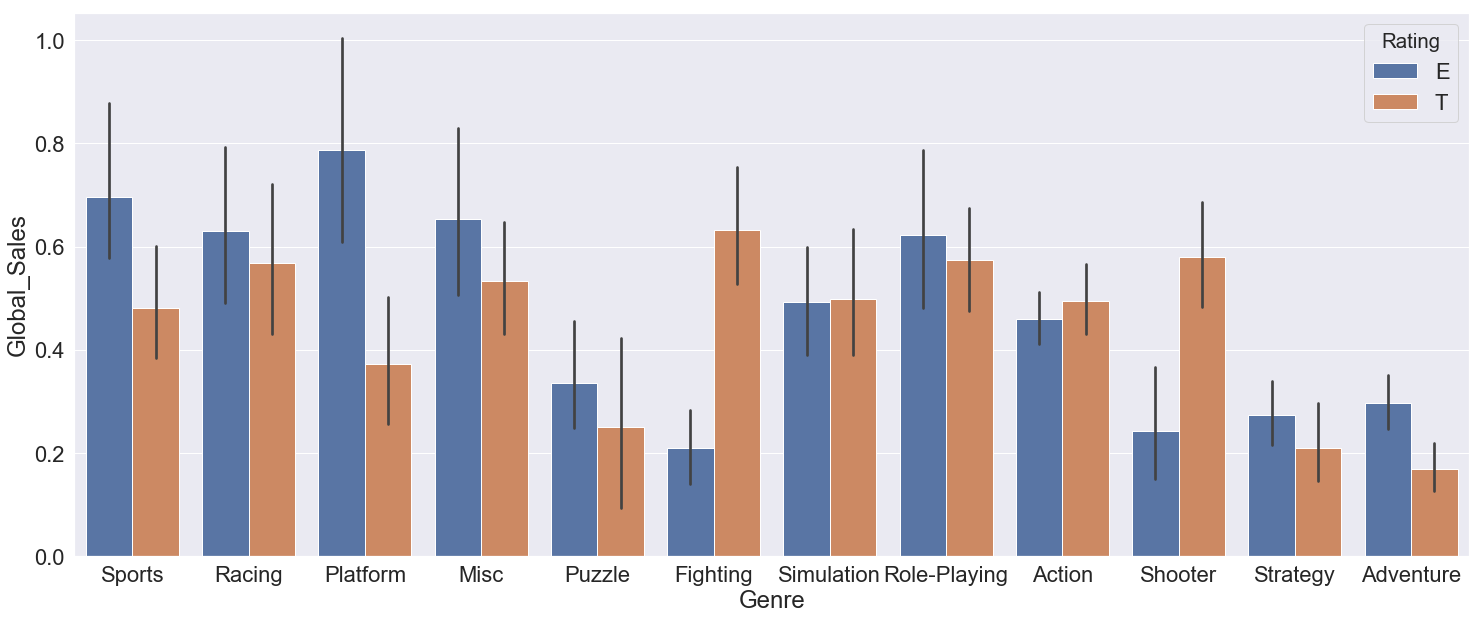

In [81]:
sns.set_style('whitegrid')
sns.set(font_scale = 2)
plt.subplots(figsize=(25,10))
sns.barplot(x='Genre', y='Global_Sales', hue='Rating', data=games)

For the box and violin plots below, I only used a subset of the data, omitting any results with greater than 1 million units sold, for readibility.

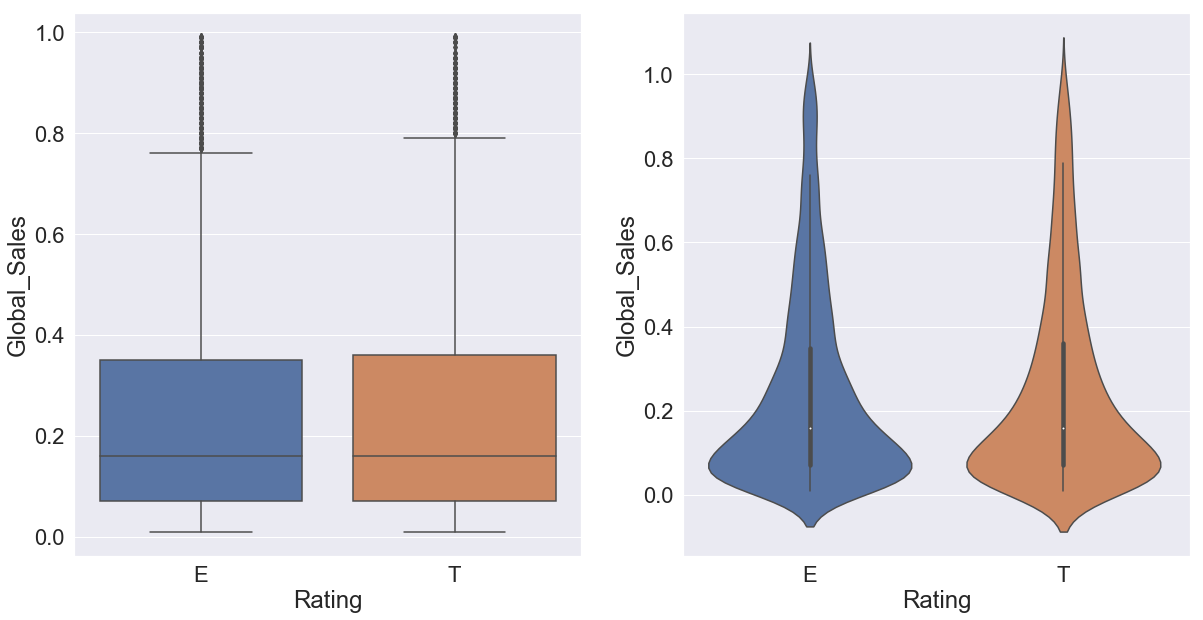

In [63]:
sales_norm = games[games['Global_Sales'] < 1]
plt.subplots(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.boxplot(x='Rating', y='Global_Sales', 
            order=['E', 'T'], data=sales_norm)
plt.subplot(1, 2, 2)
sns.violinplot(x='Rating', y='Global_Sales', data=sales_norm)

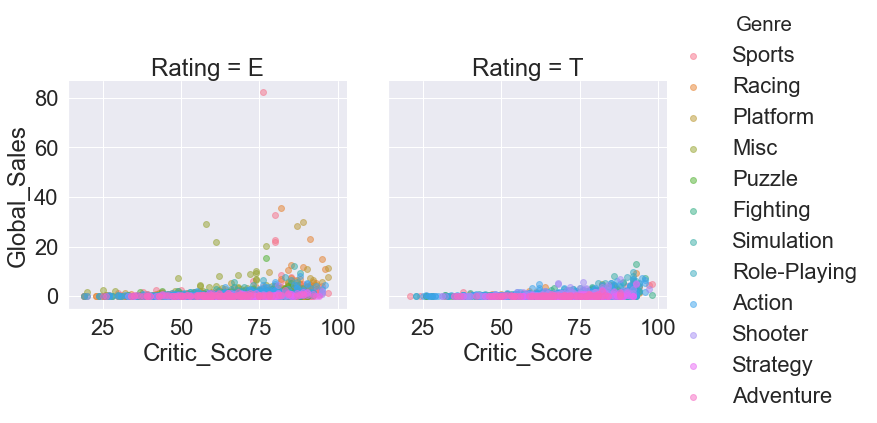

In [64]:
sns.lmplot(y='Global_Sales', x='Critic_Score', hue='Genre', data=games,
            col='Rating', fit_reg=False, ci=False, scatter_kws={'alpha':0.5})

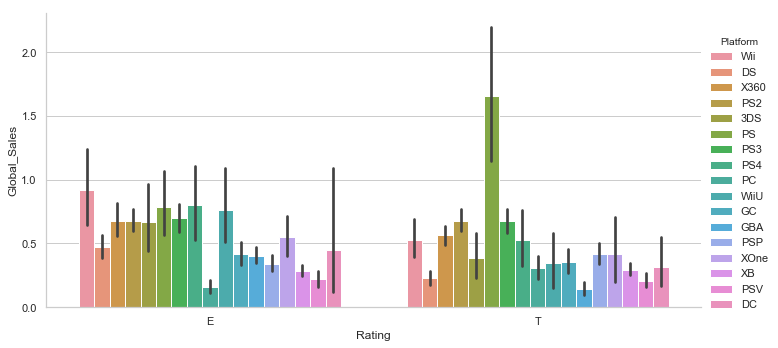

In [69]:
sns.set(style="whitegrid")
cat = sns.catplot(x="Rating", y="Global_Sales", hue='Platform', data=games,  
                  height=5, aspect=2, kind="bar")

Wow charts are cool.  But are these differences meaningful beyond random chance.  Let's calculate a t-statistic and corresponding p-value to try and determine if these differences are significant.

In [66]:
global_test = stats.ttest_ind(games[games.Rating == 'E'].Global_Sales,
                games[games.Rating == 'T'].Global_Sales, equal_var=False)

print("Global Sales Significance Test: \n{}".format(global_test))

Global Sales Significance Test: 
Ttest_indResult(statistic=2.146921406507474, pvalue=0.031829077444646366)


With a p-value of < 0.05, it looks like we can say that, based on prior video game sales data, there is a statistically significant difference between global sales of games rated 'E' versus games rated 'T'.  But is there a statistically significant difference among all of the regions?  Let's delve a bit deeper and see if any difference emerge among game sales by region.

In [67]:
na_test = stats.ttest_ind(games[games.Rating == 'E'].NA_Sales,
                games[games.Rating == 'T'].NA_Sales, equal_var=False)
eu_test = stats.ttest_ind(games[games.Rating == 'E'].EU_Sales,
                games[games.Rating == 'T'].EU_Sales, equal_var=False)
jp_test = stats.ttest_ind(games[games.Rating == 'E'].JP_Sales,
                games[games.Rating == 'T'].JP_Sales, equal_var=False)
other_test = stats.ttest_ind(games[games.Rating == 'E'].Other_Sales,
                games[games.Rating == 'T'].Other_Sales, equal_var=False)
print("North American Sales Significance Test: \n{}".format(na_test))
print("\nEuropean Sales Significance Test: \n{}".format(eu_test))
print("\nJapanese Sales Significance Test: \n{}".format(jp_test))
print("\nOther Sales Region Significance Test: \n{}".format(other_test))

North American Sales Significance Test: 
Ttest_indResult(statistic=3.1594746629671677, pvalue=0.001586300707409994)

European Sales Significance Test: 
Ttest_indResult(statistic=1.9702413310654718, pvalue=0.04884445589033236)

Japanese Sales Significance Test: 
Ttest_indResult(statistic=-1.2596898184820162, pvalue=0.20782267945416338)

Other Sales Region Significance Test: 
Ttest_indResult(statistic=1.171231263202459, pvalue=0.2415398216410706)


North American and European sales trend the same way as the overall Global Sales, both with p-values < 0.05, indicating that there is some statistically significant difference between sales of E rated games versus T rated games in those territories. <br>

Japanese and all other sales regions, in contrast, have p-values > 0.05 indicating that we can't be sure these differences aren't just due to random statistical noise.  For the Japanese sales data, this could simply be a result of less available data, as only 1,643 of the 8,219 list of games were recorded as having sold anything in Japan.

### Rollout Plan:

The experiment will take a place a year from now, where worldwide sales data for all games rated E or T that have been released since today's date will be collected.  That two main variables that we're interested in for this experiment are global units sold as well as rating.  Some secondary variables that we will also collect in order to perform further analysis on our new dataset will be platform, developer, publisher, genre, release date, critic score, and user score.  The last two of those variables will be attainment via metacritic.com. 

### Evaluation Plan:
Success in this experiment constitutes a result in which global sales for all games rated E that are released within the next year exceed sales of games rated T by greater than or equal to 10%.  If results are between 0%-10%, we will wait 6 months and add in sales data from new games as well as additional sales data from existing games in the dataset.  If the results are < 0% or still between 0%-10% after 6 additional months, the experiment will be considered a failure and we will conclude that whether a game is rated E or T has little to no realistic bearing on how well a game sells.